<a href="https://colab.research.google.com/github/AlyssonBaumgarten/Atividade_redes_neurais/blob/main/C%C3%B3pia_de_aula3a_multiclasse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
from sklearn.datasets import load_wine
dataset = load_wine()
X, y = dataset.data, dataset.target
X.shape, y.shape

((178, 13), (178,))

In [74]:
set(y)

{0, 1, 2}

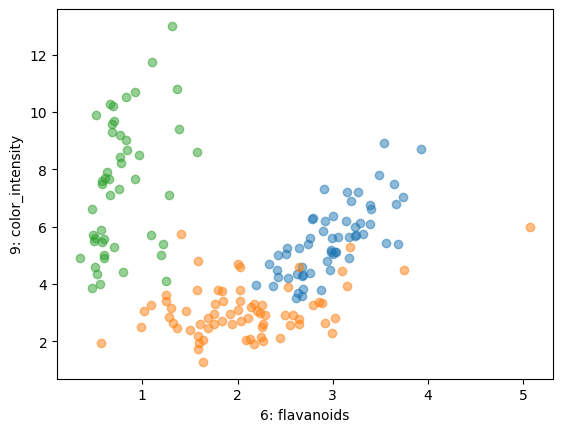

In [75]:
import matplotlib.pyplot as plt
i, j = 6, 9
Xtmp = X[:,[i,j]]
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5)
plt.show()

In [76]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
class knn(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    self.X = X
    self.y = y
  def distancia(self, x):
    diferenca = self.X - x
    quadrado = diferenca**2
    soma = np.sum(quadrado, axis=1)
    raiz = np.sqrt(soma)
    return raiz
  def predict(self, X):
    ypred = np.empty((X.shape[0],))
    for i in range(X.shape[0]):
      distancias = self.distancia(X[i])
      vizinho = np.argmin((distancias))
      ypred[i] = self.y[vizinho]
    return ypred

modelo = knn()
modelo.fit(Xtmp, y)
ypred = modelo.predict(Xtmp)
sum(ypred==y)/len(y)


1.0

In [77]:
from sklearn.metrics import accuracy_score
modelo = knn()
modelo.fit(X, y)
accuracy_score(y, modelo.predict(X))

1.0

In [78]:
from sklearn.model_selection import cross_validate
cross_validate(knn(), X, y)

{'fit_time': array([1.29222870e-04, 1.05381012e-04, 8.46385956e-05, 5.34057617e-05,
        5.12599945e-05]),
 'score_time': array([0.00338149, 0.00389051, 0.00128746, 0.0012567 , 0.00118327]),
 'test_score': array([0.80555556, 0.63888889, 0.66666667, 0.68571429, 0.82857143])}

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3)
modelo = knn()
modelo.fit(Xtr, ytr)
ypred = modelo.predict(Xte)
confusion_matrix(yte, ypred)

array([[16,  0,  1],
       [ 1, 17,  5],
       [ 1,  3, 10]])

In [80]:
from sklearn.metrics import f1_score
f1_score(yte, ypred, average="macro")

0.7905500184569951

In [81]:
sum(y==0), sum(y==1), sum(y==2)

(59, 71, 48)

In [82]:
cross_validate(knn(), X, y, scoring="f1_macro")

{'fit_time': array([1.42574310e-04, 6.38961792e-05, 6.05583191e-05, 4.95910645e-05,
        4.55379486e-05]),
 'score_time': array([0.00357389, 0.00211668, 0.00207663, 0.00191045, 0.00201011]),
 'test_score': array([0.80371184, 0.63163031, 0.65010893, 0.67301587, 0.80277778])}

In [83]:
cross_validate(knn(), X, y, scoring=['precision_macro', 'recall_macro'])

{'fit_time': array([9.20295715e-05, 8.98838043e-05, 5.65052032e-05, 5.10215759e-05,
        5.14984131e-05]),
 'score_time': array([0.0080657 , 0.00390649, 0.00312471, 0.00306439, 0.00323582]),
 'test_precision_macro': array([0.8022533 , 0.64814815, 0.7       , 0.74603175, 0.80903541]),
 'test_recall_macro': array([0.81031746, 0.64444444, 0.64126984, 0.65608466, 0.80740741])}

In [84]:
from sklearn.model_selection import RepeatedStratifiedKFold
cross_validate(knn(), X, y, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
               cv=RepeatedStratifiedKFold())

{'fit_time': array([1.13487244e-04, 6.60419464e-05, 6.12735748e-05, 5.84125519e-05,
        5.50746918e-05, 9.79900360e-05, 9.65595245e-05, 2.73227692e-04,
        5.36441803e-05, 6.96182251e-05, 5.36441803e-05, 5.43594360e-05,
        6.05583191e-05, 4.93526459e-05, 4.95910645e-05, 5.03063202e-05,
        5.26905060e-05, 5.07831573e-05, 5.24520874e-05, 5.93662262e-05,
        5.88893890e-05, 5.07831573e-05, 5.12599945e-05, 5.22136688e-05,
        5.05447388e-05, 8.05854797e-05, 5.12599945e-05, 9.77516174e-05,
        1.38521194e-04, 8.82148743e-05, 6.50882721e-05, 7.00950623e-05,
        5.36441803e-05, 5.84125519e-05, 5.57899475e-05, 6.98566437e-05,
        6.24656677e-05, 7.82012939e-05, 5.72204590e-05, 5.31673431e-05,
        5.14984131e-05, 5.19752502e-05, 5.19752502e-05, 5.00679016e-05,
        5.07831573e-05, 5.12599945e-05, 5.17368317e-05, 5.14984131e-05,
        4.95910645e-05, 6.12735748e-05]),
 'score_time': array([0.00979137, 0.00468588, 0.00463557, 0.0045073 , 0.00464463,


In [85]:
from sklearn.linear_model import Perceptron
modelos = cross_validate(Perceptron(), X, y,
                        cv=RepeatedStratifiedKFold(random_state=42),
                        return_estimator=True)
modelo = modelos['estimator'][0]
modelo, sum(modelos['test_score'])/50999

(Perceptron(), 0.0005617134727509441)

In [86]:
modelo.intercept_

array([-105.,  114.,   19.])

In [87]:
modelo.coef_[:,[6,9]]

array([[  109.82    ,  -490.499995],
       [  416.45    , -1222.54999 ],
       [ -339.16    ,   929.879991]])

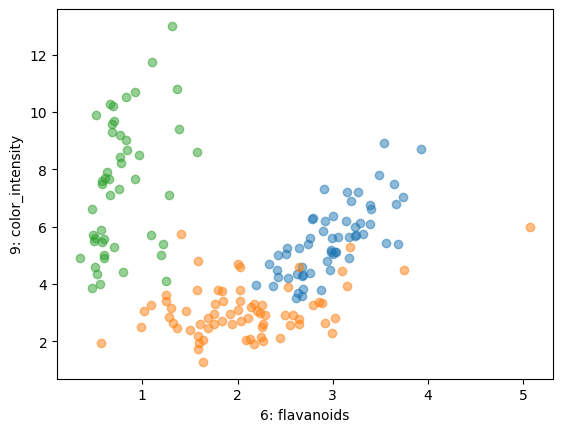

In [88]:
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5)


plt.show()



In [89]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin

def addBias(X):
  bias  = np.ones((X.shape[0], 1))
  X_b = np.concatenate((bias, X), axis=1)
  return X_b

class clf_linear(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    X_b = addBias(X)
    self.labels_ = list(set(y))
    self.w = np.random.uniform(size=(X_b.shape[1],len(self.labels_)))
    yhot = np.zeros((len(y),len(self.labels_)))
    for i in range(len(self.labels_)):
      yhot[:,i] = y==self.labels_[i]
    for _ in range(10000):
      ypred = X_b.dot(self.w)
      erros = ypred - yhot
      ajuste = X_b.T @ erros
      lr = 0.0005 / len(y)
      # print(ajuste)
      self.w = self.w - lr * ajuste

  def predict(self, X):
    X_b = addBias(X)
    ypred = X_b.dot(self.w)
    ypred = np.argmax(ypred, axis=1)
    ypred = np.array([self.labels_[i] for i in ypred])
    return ypred

modelo = clf_linear()
modelo.fit(Xtmp, y)
ypred = modelo.predict(Xtmp)
sum(ypred==y)/len(y)


0.9269662921348315

In [90]:
intercept = modelo.w[0]
coef = modelo.w[1:]

def plot_hyperplane(X, coef, intercept, column=0, color='black'):
  def line(x0):
    return (-(x0 * coef[0, column]) - intercept[column]) / coef[1, column]
  xmin = min(X[:,0])
  xmax = max(X[:,0])
  plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="-", color=color)

0.9157303370786517


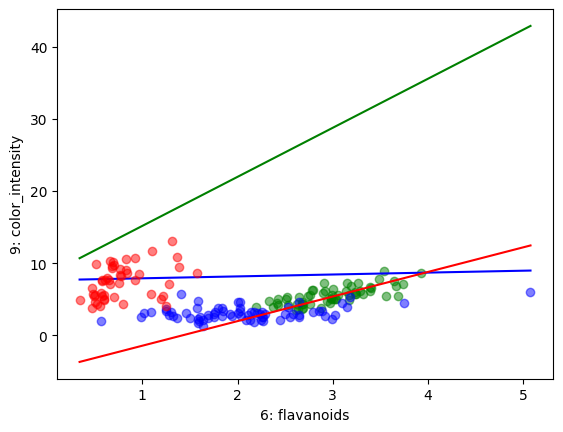

In [91]:
modelo = clf_linear()
modelo.fit(Xtmp, y)
print(sum(modelo.predict(Xtmp)==y)/len(y))
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
colors = ['green', 'blue', 'red']
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5, color=colors[k])
  plot_hyperplane(Xtmp, modelo.w[1:], modelo.w[0], k, colors[k])
plt.show()